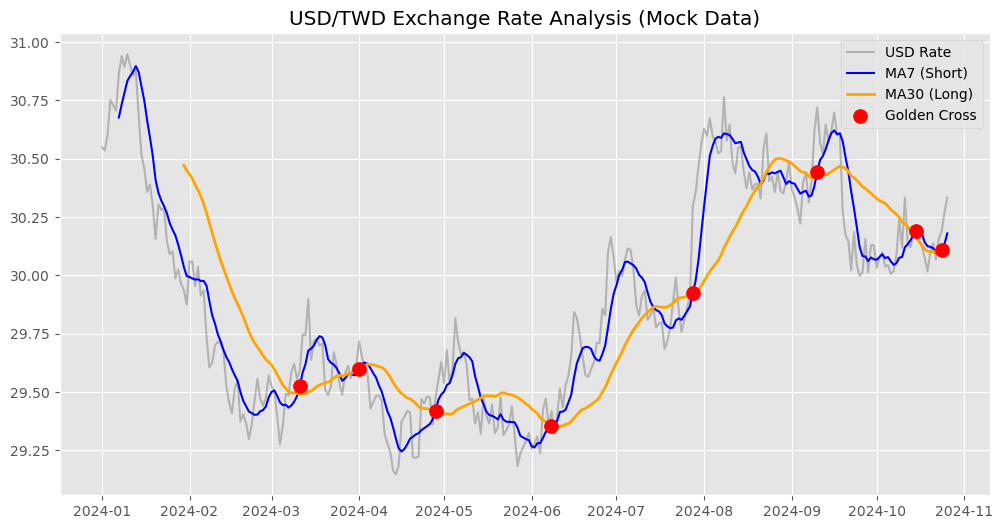

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') 

# --- 1. 模擬創造數據 ---
dates = pd.date_range(start='2024-01-01', periods=300)
np.random.seed(42) 
price_changes = np.random.normal(0, 0.1, 300) 
prices = 30.5 + np.cumsum(price_changes) 

df = pd.DataFrame({'Date': dates, 'USD': prices})

# --- 2. 資料清洗與計算 ---
df.set_index('Date', inplace=True)
df['MA30'] = df['USD'].rolling(window=30).mean()
df['MA7'] = df['USD'].rolling(window=7).mean()

prev_MA7 = df['MA7'].shift(1)
prev_MA30 = df['MA30'].shift(1)
df['Golden_Cross'] = (df['MA7'] > df['MA30']) & (prev_MA7 < prev_MA30)

# --- 3. 畫圖 ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['USD'], label='USD Rate', color='gray', alpha=0.5)
plt.plot(df.index, df['MA7'], label='MA7 (Short)', color='blue', linewidth=1.5)
plt.plot(df.index, df['MA30'], label='MA30 (Long)', color='orange', linewidth=2)

golden_points = df[df['Golden_Cross'] == True]
plt.scatter(golden_points.index, golden_points['MA7'], color='red', s=100, label='Golden Cross', zorder=5)

plt.title('USD/TWD Exchange Rate Analysis (Mock Data)')
plt.legend()
plt.grid(True)
plt.show()